# HW3

### Q4

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
from sklearn import linear_model  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import mean_squared_error, r2_score  

In [3]:
temp = pd.read_table("slump_test.data", sep=",")
temp2 = pd.read_table("slump_test.names")

#save temp as csv
temp.to_csv("slump_test.csv")

In [2]:
#importing the datasets
tecator_X = pd.read_csv("tecator_X.csv")
tecator_Y = pd.read_csv("tecator_Y.csv")
display(tecator_Y.head(), tecator_X.shape)
tecator_X.head()

,y
0,22.5
1,40.1
2,8.4
3,5.9
4,25.5


(215, 100)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753


In [23]:
#standardization of the data
n_comp = 15
tec_X_std = StandardScaler().fit_transform(tecator_X.values)
pca = PCA(n_components=n_comp)
tec_pca = pca.fit_transform(tec_X_std)

pca.explained_variance_ratio_

regression = linear_model.LinearRegression()
regression.fit(tec_X_std, tecator_Y)

pred_y = regression.predict(tec_X_std)

y_crossvalid = cross_val_predict(regression, tec_X_std,tecator_Y, cv=10)

score_cal = r2_score(tecator_Y, pred_y)
score_crossvalid = r2_score(tecator_Y, y_crossvalid)

print(score_cal, score_crossvalid)

0.9951112661587984 0.9524657027045825


In [19]:
#creating a function for PC regression to decide on the number of components to use
def pc_regression(X_data, y_data, num_pc):
    
    #doing pca with num_pc number of components
    temp_pca = PCA()
    tec_X_std_temp = StandardScaler().fit_transform(X_data.values)
    tec_pca_sel = temp_pca.fit_transform(tec_X_std_temp)[:, :num_pc]
    
    #performing regression on selected components
    temp_regr = linear_model.LinearRegression()
    temp_regr.fit(tec_X_std_temp, y_data)
    
    #using the linear model to predict the points
    y_hat = temp_regr.predict(tec_X_std_temp)
    
    #cross-validation
    y_crossvalid = cross_val_predict(temp_regr, tec_X_std_temp,y_data, cv=10)
    
    #calculating the scores for crossvalidation and calibration
    score_cal = r2_score(y_data, y_hat)
    score_crossvalid = r2_score(y_data, y_crossvalid)
    
    #calculating mse for calibration and crossvalidation
    mse_c = mean_squared_error(y_data, y_hat)
    mse_cv = mean_squared_error(y_data, y_crossvalid)
    
    return (y_crossvalid, score_cal, score_crossvalid, mse_c, mse_cv)

In [20]:
#collecting the stats to compare for different number of pc
mse_crossv = []
r2s_crossv = []
mse_cali = []
r2s_cali = []

for pc in range(1, 26):
    y_cv, score_c, score_cv, mse_c, mse_cv = pc_regression(tecator_X, tecator_Y, pc)
    r2s_cali.append(score_c)
    r2s_crossv.append(score_cv)
    mse_cali.append(mse_c)
    mse_crossv.append(mse_cv)

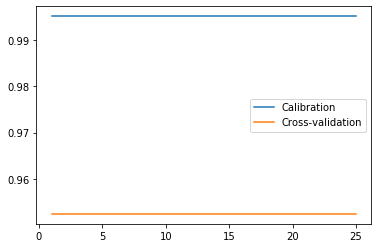

In [22]:
#plotting the graph of R2 and number of components for calibrated values and cross-validated values
x_values = np.arange(1,26)
sns.lineplot(x=x_values, y=r2s_cali, label="Calibration", markers=True)
sns.lineplot(x=x_values, y=r2s_crossv, label = "Cross-validation", markers = True)